##------------Installs + Packages--------------

##Installs

In [ ]:
# !pip install yfinance
# url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
# !wget $url/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
# !wget $url/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
# !dpkg -i libta.deb ta.deb
# !pip install ta-lib
# !pip install fear-greed-index
# !pip install finvizfinance
# !pip install finvizfinance.news
# !pip install finvizfinance.screener.overview

# import warnings
# warnings.simplefilter(action='ignore')

##Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #KNN
import sklearn.linear_model as sklin #Linear Regression
from sklearn import tree  #Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import model_selection #Grid Search
from sklearn import svm #SVM
from sklearn import naive_bayes #Naive Bayes
from sklearn import ensemble #Ada Boost
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets, cluster
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from IPython.display import display
from finvizfinance.quote import finvizfinance
pd.options.display.max_columns = None
pd.options.display.float_format = '{:,.0f}'.format
import talib
import yfinance as yf
from datetime import datetime


##Discriptive Data - Finviz

In [ ]:
# Finviz API
stock = finvizfinance('TSLA')

stock_fundament = stock.ticker_fundament()
stock_fundament_df = pd.DataFrame({'Fundamental Param': stock_fundament.keys(), 'Param Values': stock_fundament.values()}).transpose()
stock_description = stock.ticker_description()
outer_ratings_df = stock.ticker_outer_ratings()
# stock_signal_df = stock.ticker_signal()
news_df = stock.ticker_news()
insider_trader_df = stock.ticker_inside_trader()

print(f"stock_description\n{stock_description}\n\nstock_fundament\n{stock_fundament}\n\outer_ratings_df\n{outer_ratings_df}\n\news_df\n{news_df}\ninsider trader:{insider_trader_df}")


# Getting recent financial news from finviz
from finvizfinance.news import News

fnews = News()
all_news = fnews.get_news
# all_news['news'].head()
# all_news['blogs'].head()
# stock.ticker_charts()
# stock.ticker_signal()

stock_description
Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extended service plans. The Energy Generation and Stor

## ----------------Data Importer----------------------

##Stocks Screener - Finviz

In [ ]:
# Overview

from finvizfinance.screener.overview import Overview
from finvizfinance.screener.financial import Financial
from finvizfinance.screener.technical import Technical


foverview = Overview()
ffinancial = Financial()

filters_dict = {'Index':'S&P 500', 'Industry':'Semiconductors'}#, 'Country': 'USA', 'RSI (14)': 'Overbought (80)', } #'Any' 
# 'RSI (14)': 'Oversold (30)' / 'Not Oversold (>50)'
foverview.set_filter(filters_dict=filters_dict)
ffinancial.set_filter(filters_dict=filters_dict)
df = foverview.screener_view().sort_values(by='Volume', ascending=False)


# Screener Example
# ffinancial = Financial()
# filters_dict = {'RSI (14)': 'Oversold (30)'}
# ffinancial.set_filter(filters_dict=filters_dict)
# df = foverview.ScreenerView().sort_values(by='Volume', ascending=False)

## Dataset

In [ ]:
df.reset_index(drop=True)

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,AMD,"Advanced Micro Devices, Inc.",Technology,Semiconductors,USA,"171,130,000,000",43,138,0,"53,753,970"
1,NVDA,NVIDIA Corporation,Technology,Semiconductors,USA,"719,190,000,000",86,280,0,"29,828,890"
2,INTC,Intel Corporation,Technology,Semiconductors,USA,"229,250,000,000",11,56,-0,"15,137,796"
3,MU,"Micron Technology, Inc.",Technology,Semiconductors,USA,"106,860,000,000",15,95,0,"8,370,041"
4,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,USA,"214,020,000,000",24,187,0,"4,385,393"
5,TXN,Texas Instruments Incorporated,Technology,Semiconductors,USA,"177,480,000,000",24,186,0,"2,365,436"
6,MCHP,Microchip Technology Incorporated,Technology,Semiconductors,USA,"48,880,000,000",63,85,0,"1,645,923"
7,AVGO,Broadcom Inc.,Technology,Semiconductors,USA,"264,250,000,000",41,622,-0,"1,121,702"
8,XLNX,"Xilinx, Inc.",Technology,Semiconductors,USA,"52,530,000,000",62,198,-0,"1,111,791"
9,ADI,"Analog Devices, Inc.",Technology,Semiconductors,USA,"95,650,000,000",47,173,-0,"1,007,100"


## Data Importer - Yahoo Finance (func)

In [ ]:
def read_data_for_ticker(ticker):
  stock_data = yf.download(ticker, start=startdate, end= enddate)
  stock_data.reset_index()
  stock_data.insert(loc = 0, column='Ticker', value = ticker)
  return stock_data

## --------------Feature Engineer------------------

##Calculate Indicators (func)

In [ ]:
def calculate_indicators_for_ticker(stock_data):
  #Overlap Studies Functions


  stock_data['SMA_9'] = talib.SMA(stock_data['Close'], timeperiod=9)
  stock_data['SMA_21'] = talib.SMA(stock_data['Close'], timeperiod=21)
  # stock_data['SMA_20V2'] = stock_data['Close'].rolling(20).mean()

  stock_data['SMA_9_21_diff'] = stock_data['SMA_9'] / stock_data['SMA_21']-1
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']>stock_data['SMA_21'],1,0)
  stock_data['SIGNAL_9_21'] = np.where(stock_data['SMA_9']<stock_data['SMA_21'],-1,stock_data['SIGNAL_9_21'])

  stock_data['return'] = np.log(stock_data['Close']).diff()
  stock_data['system_return'] = stock_data['SIGNAL_9_21'] * stock_data['return']
  stock_data['entry'] = stock_data['SIGNAL_9_21'].diff()
  stock_data['SMA_50'] = talib.SMA(stock_data['Close'], timeperiod=50)
  stock_data['SIGNAL_21_50'] = np.where(stock_data['SMA_21']>stock_data['SMA_50'],1,0)
  stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)
  stock_data['EMA_50'] = talib.EMA(stock_data['Close'], timeperiod=50)
  # stock_data['EMA_200'] = talib.EMA(stock_data['Close'], timeperiod=200)

  # stock_data['MA_30'] = talib.MA(stock_data['Close'], timeperiod=30, matype=0) # MA - Moving average
  # stock_data['MIDPOINT_14'] = talib.MIDPOINT(stock_data['Close'], timeperiod=14) # MIDPOINT - MidPoint over period
  # stock_data['MIDPRICE_14'] = talib.MIDPRICE(stock_data['High'], stock_data['Low'], timeperiod=14) # MIDPRICE - Midpoint Price over period
  # stock_data['TRIMA_30']= talib.TRIMA(stock_data['Close'], timeperiod=30) # TRIMA - Triangular Moving Average
  # stock_data['WMA_30'] = talib.WMA(stock_data['Close'], timeperiod=30) # WMA - Weighted Moving Average
  upper, mid, lower = talib.BBANDS(stock_data['Close'], nbdevup=2, nbdevdn=2, timeperiod=20)
  stock_data['lower_BBANDS_20'] = lower
  stock_data['Mid_BBANDS_20'] = mid
  stock_data['Upper_BBANDS_20'] = upper
  stock_data['BBANDS_Buy Signal'] = np.where(stock_data.Upper_BBANDS_20 > stock_data.Close, True, False)
  stock_data['BBANDS_Sell Signal'] = np.where(stock_data.Upper_BBANDS_20 < stock_data.Close, True, False)

  # stock_data['SAR'] = talib.SAR(stock_data['High'], stock_data['Low'], acceleration=0, maximum=0) # SAR - Parabolic SAR
  # stock_data['TEMA'] = talib.TEMA(stock_data['Close'], timeperiod=30) # TEMA - Triple Exponential Moving Average


  # Momentum Indicator Functions
  stock_data['ADX'] = talib.ADX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) #ADX - Average Directional Movement Index
  stock_data['RSI'] = talib.RSI(stock_data['Close'], timeperiod=14)
  stock_data['MOM'] = talib.MOM(stock_data['Close'], timeperiod=10) #MOM - Momentum
  stock_data['ROC'] = talib.ROC(stock_data['Close'], timeperiod=10) #ROC - Rate of change : ((price/prevPrice)-1)*100
  stock_data['CCI'] = talib.CCI(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # CCI - Commodity Channel Index
  # macd, macdsignal, macdhist = talib.MACD(stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
  # stock_data['MACD'] = macd
  # stock_data['MACDSignal'] = macdsignal
  # stock_data['MACDHist'] = macdhist
  # stock_data['MFI'] = talib.MFI(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], timeperiod=14) #MFI - Money Flow Index
  # stock_data['CMO'] = talib.CMO(stock_data['Close'], timeperiod=14) # Chande Momentum Oscillator
  # stock_data['DX'] = talib.DX(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # Directional Movement Index
  # stock_data['BOP'] = talib.BOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # BOP - Balance Of Power
  # stock_data['WILLR'] = talib.WILLR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # WILLR - Williams' %R
  # fastk, fastd = talib.STOCHRSI(stock_data['Close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0) # STOCHRSI - Stochastic Relative Strength Index
  # stock_data['STOCHRSI_fastk'] = fastk
  # stock_data['STOCHRSI_fastd'] = fastd
  # slowk, slowd = talib.STOCH(stock_data['High'], stock_data['Low'], stock_data['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0) # STOCH - Stochastic
  # stock_data['STOCH_slowk'] = slowk
  # stock_data['STOCH_slowd'] = slowd
  # stock_data['PPO'] = talib.PPO(stock_data['Close'], fastperiod=12, slowperiod=26, matype=0) # PPO - Percentage Price Oscillator
  stock_data['ROC']= talib.ROC(stock_data['Close'], timeperiod=10) # ROC - Rate of change : ((price/prevPrice)-1)*100
  # stock_data['ROCP']= talib.ROCP(stock_data['Close'], timeperiod=10) # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  # stock_data['ROCR']= talib.ROCR(stock_data['Close'], timeperiod=10) # ROCR - Rate of change ratio: (price/prevPrice)


  # Volume Indicator Functions
  # stock_data['AD'] = talib.AD(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume']) # AD - Chaikin A/D Line
  # stock_data['ADOSC'] = talib.ADOSC(stock_data['High'], stock_data['Low'], stock_data['Close'], stock_data['Volume'], fastperiod=3, slowperiod=10) # ADOSC - Chaikin A/D Oscillator
  # stock_data['OBV'] = talib.OBV(stock_data['Close'], stock_data['Volume']) # OBV - On Balance Volume


  # Volatility Indicator Functions
  # stock_data['ATR'] = talib.ATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # ATR - Average True Range
  # stock_data['NATR'] = talib.NATR(stock_data['High'], stock_data['Low'], stock_data['Close'], timeperiod=14) # NATR - Normalized Average True Range
  # stock_data['TRANGE'] = talib.TRANGE(stock_data['High'], stock_data['Low'], stock_data['Close']) # TRANGE - True Range


  # Cycle Indicator Functions
  # stock_data['HT_DCPERIOD'] = talib.HT_DCPERIOD(stock_data['Close']) # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
  # stock_data['HT_DCPHASE'] = talib.HT_DCPHASE(stock_data['Close']) # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
  # inphase, quadrature = talib.HT_PHASOR(stock_data['Close']) # HT_PHASOR - Hilbert Transform - Phasor Components
  # stock_data['INPHASE'] = inphase
  # stock_data['Quadrature'] = quadrature
  # sine, leadsine = talib.HT_SINE(stock_data['Close']) # HT_SINE - Hilbert Transform - SineWave
  # stock_data['SINE'] = sine
  # stock_data['LeadSine'] = leadsine
  # stock_data['HT_TRENDMODE']= talib.HT_TRENDMODE(stock_data['Close']) # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode


  # Pattern Recognition Functions
  # stock_data['CDL2CROWS'] = talib.CDL2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL2CROWS - Two Crows
  # stock_data['CDL3BLACKCROWS'] = talib.CDL3BLACKCROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3BLACKCROWS - Three Black Crows
  # stock_data['CDL3INSIDE'] = talib.CDL3INSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3INSIDE - Three Inside Up/Down
  # stock_data['CDL3LINESTRIKE'] = talib.CDL3LINESTRIKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3LINESTRIKE - Three-Line Strike
  # stock_data['CDL3OUTSIDE'] = talib.CDL3OUTSIDE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3OUTSIDE - Three Outside Up/Down
  # stock_data['CDL3STARSINSOUTH'] = talib.CDL3STARSINSOUTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3STARSINSOUTH - Three Stars In The South
  # stock_data['CDL3WHITESOLDIERS'] = talib.CDL3WHITESOLDIERS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDL3WHITESOLDIERS - Three Advancing White Soldiers
  # stock_data['CDLABANDONEDBABY'] = talib.CDLABANDONEDBABY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLABANDONEDBABY - Abandoned Baby
  # stock_data['CDLADVANCEBLOCK'] = talib.CDLADVANCEBLOCK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLADVANCEBLOCK - Advance Block
  # stock_data['CDLBELTHOLD'] = talib.CDLBELTHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBELTHOLD - Belt-hold
  # stock_data['CDLBREAKAWAY'] = talib.CDLBREAKAWAY(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLBREAKAWAY - Breakaway
  # stock_data['CDLCLOSINGMARUBOZU'] = talib.CDLCLOSINGMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCLOSINGMARUBOZU - Closing Marubozu
  # stock_data['CDLCONCEALBABYSWALL'] = talib.CDLCONCEALBABYSWALL(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCONCEALBABYSWALL - Concealing Baby Swallow
  # stock_data['CDLCOUNTERATTACK'] = talib.CDLCOUNTERATTACK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLCOUNTERATTACK - Counterattack
  # stock_data['CDLDARKCLOUDCOVER'] = talib.CDLDARKCLOUDCOVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLDARKCLOUDCOVER - Dark Cloud Cover
  # stock_data['CDLDOJI'] = talib.CDLDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJI - Doji
  # stock_data['CDLDOJISTAR'] = talib.CDLDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDOJISTAR - Doji Star
  # stock_data['CDLDRAGONFLYDOJI'] = talib.CDLDRAGONFLYDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLDRAGONFLYDOJI - Dragonfly Doji
  # stock_data['CDLENGULFING'] = talib.CDLENGULFING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLENGULFING - Engulfing Pattern
  # stock_data['CDLEVENINGDOJISTAR'] = talib.CDLEVENINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGDOJISTAR - Evening Doji Star
  # stock_data['CDLEVENINGSTAR'] = talib.CDLEVENINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLEVENINGSTAR - Evening Star
  # stock_data['CDLGAPSIDESIDEWHITE'] = talib.CDLGAPSIDESIDEWHITE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
  # stock_data['CDLGRAVESTONEDOJI'] = talib.CDLGRAVESTONEDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLGRAVESTONEDOJI - Gravestone Doji
  # stock_data['CDLHAMMER'] = talib.CDLHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHAMMER - Hammer
  # stock_data['CDLHANGINGMAN'] = talib.CDLHANGINGMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHANGINGMAN - Hanging Man
  # stock_data['CDLHARAMI'] = talib.CDLHARAMI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMI - Harami Pattern
  # stock_data['CDLHARAMICROSS'] = talib.CDLHARAMICROSS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHARAMICROSS - Harami Cross Pattern
  # stock_data['CDLHIGHWAVE'] = talib.CDLHIGHWAVE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIGHWAVE - High-Wave Candle
  # stock_data['CDLHIKKAKE'] = talib.CDLHIKKAKE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKE - Hikkake Pattern
  # stock_data['CDLHIKKAKEMOD'] = talib.CDLHIKKAKEMOD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHIKKAKEMOD - Modified Hikkake Pattern
  # stock_data['CDLHOMINGPIGEON'] = talib.CDLHOMINGPIGEON(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLHOMINGPIGEON - Homing Pigeon
  # stock_data['CDLIDENTICAL3CROWS'] = talib.CDLIDENTICAL3CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLIDENTICAL3CROWS - Identical Three Crows
  # stock_data['CDLINNECK'] = talib.CDLINNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINNECK - In-Neck Pattern
  # stock_data['CDLINVERTEDHAMMER'] = talib.CDLINVERTEDHAMMER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLINVERTEDHAMMER - Inverted Hammer
  # stock_data['CDLKICKING'] = talib.CDLKICKING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'])# CDLKICKING - Kicking
  # stock_data['CDLKICKINGBYLENGTH'] = talib.CDLKICKINGBYLENGTH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
  # stock_data['CDLLADDERBOTTOM'] = talib.CDLLADDERBOTTOM(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLADDERBOTTOM - Ladder Bottom
  # stock_data['CDLLONGLEGGEDDOJI'] = talib.CDLLONGLEGGEDDOJI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLEGGEDDOJI - Long Legged Doji
  # stock_data['CDLLONGLINE'] = talib.CDLLONGLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLLONGLINE - Long Line Candle
  # stock_data['CDLMARUBOZU'] = talib.CDLMARUBOZU(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMARUBOZU - Marubozu
  # stock_data['CDLMATCHINGLOW'] = talib.CDLMATCHINGLOW(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLMATCHINGLOW - Matching Low
  # stock_data['CDLMATHOLD'] = talib.CDLMATHOLD(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMATHOLD - Mat Hold
  # stock_data['CDLMORNINGDOJISTAR'] = talib.CDLMORNINGDOJISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGDOJISTAR - Morning Doji Star
  # stock_data['CDLMORNINGSTAR'] = talib.CDLMORNINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close'], penetration=0) # CDLMORNINGSTAR - Morning Star
  # stock_data['CDLONNECK'] = talib.CDLONNECK(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLONNECK - On-Neck Pattern
  # stock_data['CDLPIERCING'] = talib.CDLPIERCING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLPIERCING - Piercing Pattern
  # stock_data['CDLRICKSHAWMAN'] = talib.CDLRICKSHAWMAN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRICKSHAWMAN - Rickshaw Man
  # stock_data['CDLRISEFALL3METHODS'] = talib.CDLRISEFALL3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLRISEFALL3METHODS - Rising/Falling Three Methods
  # stock_data['CDLSEPARATINGLINES'] = talib.CDLSEPARATINGLINES(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSEPARATINGLINES - Separating Lines
  # stock_data['CDLSHOOTINGSTAR'] = talib.CDLSHOOTINGSTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHOOTINGSTAR - Shooting Star
  # stock_data['CDLSHORTLINE'] = talib.CDLSHORTLINE(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSHORTLINE - Short Line Candle
  # stock_data['CDLSPINNINGTOP'] = talib.CDLSPINNINGTOP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSPINNINGTOP - Spinning Top
  # stock_data['CDLSTALLEDPATTERN'] = talib.CDLSTALLEDPATTERN(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTALLEDPATTERN - Stalled Pattern
  # stock_data['CDLSTICKSANDWICH'] = talib.CDLSTICKSANDWICH(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLSTICKSANDWICH - Stick Sandwich
  # stock_data['CDLTAKURI'] = talib.CDLTAKURI(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
  # stock_data['CDLTASUKIGAP'] = talib.CDLTASUKIGAP(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTASUKIGAP - Tasuki Gap
  # stock_data['CDLTHRUSTING'] = talib.CDLTHRUSTING(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTHRUSTING - Thrusting Pattern
  # stock_data['CDLTRISTAR'] = talib.CDLTRISTAR(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLTRISTAR - Tristar Pattern
  # stock_data['CDLUNIQUE3RIVER'] = talib.CDLUNIQUE3RIVER(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUNIQUE3RIVER - Unique 3 River
  # stock_data['CDLUPSIDEGAP2CROWS'] = talib.CDLUPSIDEGAP2CROWS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
  # stock_data['CDLXSIDEGAP3METHODS'] = talib.CDLXSIDEGAP3METHODS(stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']) # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods


  #Statistic Functions
  # stock_data['BETA_5'] = talib.BETA(stock_data['High'], stock_data['Low'], timeperiod=5) # BETA - Beta
  # stock_data['CORREL_30'] = talib.CORREL(stock_data['High'], stock_data['Low'], timeperiod=30) # CORREL - Pearson's Correlation Coefficient (r)
  # stock_data['LINEARREG_14'] = talib.LINEARREG(stock_data['Close'], timeperiod=14) # LINEARREG - Linear Regression
  # stock_data['LINEARREG_ANGLE_14'] = talib.LINEARREG_ANGLE(stock_data['Close'], timeperiod=14) # LINEARREG_ANGLE - Linear Regression Angle
  # stock_data['LINEARREG_INTERCEPT_14'] = talib.LINEARREG_INTERCEPT(stock_data['Close'], timeperiod=14) # LINEARREG_INTERCEPT - Linear Regression Intercept
  # stock_data['LINEARREG_SLOPE_14'] = talib.LINEARREG_SLOPE(stock_data['Close'], timeperiod=14) # LINEARREG_SLOPE - Linear Regression Slope
  # stock_data['STDDEV_5'] = talib.STDDEV(stock_data['Close'], timeperiod=5, nbdev=1) # STDDEV - Standard Deviation
  # stock_data['TSF_14'] = talib.TSF(stock_data['Close'], timeperiod=14) # TSF - Time Series Forecast
  # stock_data['VAR_5'] = talib.VAR(stock_data['Close'], timeperiod=5, nbdev=1) # VAR - Variance


  return stock_data


## Class definition (func)

In [ ]:
def class_definition(stock_data, returns_pec=0.15, returns_time=7):

  # col_val = ""
  stock_data.insert(loc = 6,column = 'Target_class',value = "")

  for i in range(1, len(stock_data)):
    stock_data['Target_class'][i-returns_time] = stock_data['Close'][i]

  # convert string to float
  stock_data['Target_class'] = pd.to_numeric(stock_data['Target_class'],errors='coerce')
  
  stock_data.insert(loc = 7,column = 'Target_class_pec',value = ((stock_data['Target_class']/ stock_data['Close']) - 1))
  stock_data.insert(loc = 8,column = 'Target_class_label',value = np.where(stock_data['Target_class_pec'] > returns_pec,1,0))

  return stock_data

##Handling NA and Duplicates (func)

In [ ]:
def handling_na_duplicates(stock_data):
  print(f"Ticker: {ticker}\ncnt rows before na and dup:{len(stock_data)}")
  stock_data.isna().sum()
  stock_data.dropna(inplace = True)
  stock_data.drop_duplicates()
  print(f"cnt rows after na and dup:{len(stock_data)}")
  return stock_data


## Run funcs - Data Engineer 

In [ ]:
import warnings
warnings.simplefilter(action='ignore')

frames=[]

ticker_list = list(df['Ticker'].unique())
# ticker_list = ['TSLA']
startdate =  "2019-01-01"
enddate = datetime.today().strftime('%Y-%m-%d')

for ticker in ticker_list:

  stock_data = read_data_for_ticker(ticker)
  stock_data_with_indicators = calculate_indicators_for_ticker(stock_data)
  stock_data_with_target_class = class_definition(stock_data_with_indicators, 0.1, 21)
  stock_data_cleaned = handling_na_duplicates(stock_data_with_target_class)

  frames = stock_data_cleaned.append(frames)

df_stock_data = pd.concat([frames])
df_stock_data.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed
Ticker: AMD
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: NVDA
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: INTC
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: MU
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: QCOM
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: TXN
cnt rows before na and dup:764
cnt rows after na and dup:714
[*********************100%***********************]  1 of 1 completed
Ticker: MCHP
cnt rows before na and dup:764
cnt rows after na and dup:714
[**

## Show Dataset

In [ ]:
# pd.options.display.max_rows=100000
df_stock_data.head(200)

,Date,Ticker,Open,High,Low,Close,Adj Close,Target_class,Target_class_pec,Target_class_label,Volume,SMA_9,SMA_21,SMA_9_21_diff,SIGNAL_9_21,return,system_return,entry,SMA_50,SIGNAL_21_50,EMA_20,EMA_50,lower_BBANDS_20,Mid_BBANDS_20,Upper_BBANDS_20,BBANDS_Buy Signal,BBANDS_Sell Signal,ADX,RSI,MOM,ROC,CCI
0,2019-03-14,QRVO,69,69,69,69,69,77,0,1,861700,69,68,0,1,-0,-0,0,65,1,68,65,65,68,72,True,False,13,56,-1,-2,-42
1,2019-03-15,QRVO,69,70,69,70,70,76,0,0,1440300,69,68,0,1,0,0,0,65,1,68,65,65,68,72,True,False,13,61,-1,-1,33
2,2019-03-18,QRVO,70,70,69,70,70,78,0,1,905300,69,69,0,1,0,0,0,66,1,68,66,66,69,72,True,False,12,62,-0,-0,65
3,2019-03-19,QRVO,70,71,70,70,70,77,0,0,847100,69,69,0,1,0,0,0,66,1,69,66,67,69,71,True,False,12,63,0,0,104
4,2019-03-20,QRVO,70,70,69,69,69,77,0,1,1001500,69,69,0,1,-0,-0,0,66,1,69,66,67,69,71,True,False,12,56,0,0,-5
5,2019-03-21,QRVO,71,75,71,74,74,76,0,0,2571400,70,69,0,1,0,0,0,66,1,69,66,67,70,72,False,True,13,72,6,8,302
6,2019-03-22,QRVO,74,74,72,72,72,77,0,0,1050200,70,70,0,1,-0,-0,0,67,1,69,66,67,70,72,True,False,14,61,3,5,183
7,2019-03-25,QRVO,71,72,70,71,71,77,0,0,699300,70,70,0,1,-0,-0,0,67,1,70,67,67,70,72,True,False,14,57,2,2,71
8,2019-03-26,QRVO,71,72,71,71,71,77,0,0,796400,71,70,0,1,0,0,0,67,1,70,67,67,70,72,True,False,14,58,2,3,74
9,2019-03-27,QRVO,71,72,70,71,71,75,0,0,823600,71,70,0,1,-0,-0,0,67,1,70,67,68,70,72,True,False,13,56,1,2,29


##----------------Visualize Data-------------------

## EDA Chart (func)

In [ ]:
!pip install matplotlib==3.1.3

def get_target_split(series,figX=15,figY=7):
    f,ax=plt.subplots(1,2,figsize=(figX,figY))
    series.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
    ax[0].set_title(f'{series.name} distribution')
    ax[0].set_ylabel('')
    sns.countplot(series,ax=ax[1])
    ax[0].legend(fontsize=12)
    
    ax[1].set_title(f'Count plot for {series.name}')
    for rect in ax[1].patches:
        ax[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)



##Plot trades on time series (func)

In [ ]:
def time_series_chart_cross_avg():
  plt.rcParams['figure.figsize'] = 20,10
  plt.grid(True, alpha =.3)
  plt.plot(stock_data.iloc[-365:]['Close'], color = 'y', label = ticker_list)
  plt.plot(stock_data.iloc[-365:]['SMA_9'], color = 'g', label = 'SMA_9')
  plt.plot(stock_data.iloc[-365:]['SMA_21'], color = 'r', label = 'SMA_21')

  plt.plot(stock_data[-365:].loc[stock_data.entry==2].index, stock_data[-365:]['SMA_9'][stock_data.entry==2], '^', color = 'g', markersize = 12)
  plt.plot(stock_data[-365:].loc[stock_data.entry==-2].index, stock_data[-365:]['SMA_21'][stock_data.entry==-2], 'v', color = 'r', markersize = 12)

  plt.legend(loc=2);

In [ ]:
def algo_comparision_by_cross_avg():
  plt.rcParams['figure.figsize'] = 20,10

  plt.plot(np.exp(stock_data['return']).cumprod(), label= 'Buy/Hold') # cumprod = acculmative return
  plt.plot(np.exp(stock_data['system_return']).cumprod(), label='System')
  plt.legend(loc=2)
  plt.grid(True, alpha=.3)

  print(f"return: {np.exp(stock_data['return']).cumprod()[-1]-1}\nsystem_return:{np.exp(stock_data['system_return']).cumprod()[-1]-1}")

## Market Sentiments - Fear and Greed index (func)

In [ ]:
from fear_greed_index.CNNFearAndGreedIndex import CNNFearAndGreedIndex

def Fear_and_greed_charts():
  cnn_fg = CNNFearAndGreedIndex()

  fear_and_greed_index = int(cnn_fg.get_index()[18:20])
  # plot Fear and Greed charts
  fig = plt.figure(figsize=(20, 7))
  cnn_fg.plot_all_charts(fig)
  plt.show()
  return fear_and_greed_index




In [ ]:
# print(cnn_fg.get_index())
# fear_and_greed_index = int(cnn_fg.get_index()[18:20])

# print("####################################")

# if fear_and_greed_index <32:
#   print("The Market In Fear Sentiment! Search on potential stocks.")
# elif fear_and_greed_index >75 :
#   print("The Market In Greed Sentiment! Take profit.")
# else: 
#   print("The Market In Normal Sentiment!")

# print("####################################")


##Runs Chart Visualization

In [ ]:
get_target_split(df_stock_data['Target_class_label'],15,5)
time_series_chart_cross_avg()
algo_comparision_by_cross_avg()
Fear_and_greed_charts()


##------------------Clustering---------------------


##Set Feature Clustering

In [ ]:
clustering_data = df[['Market Cap', 'Volume']]

## Normalization - all stocks toghther

In [ ]:
scaler = StandardScaler()
clustering_data_norm = scaler.fit_transform(clustering_data)
clustering_data_norm = pd.DataFrame(clustering_data_norm, columns=clustering_data.columns)


##Run model + predict

In [ ]:
kmeans = cluster.KMeans(n_clusters=3)
X_cluster = kmeans.fit_predict(clustering_data_norm)

# get centroids
pd.options.display.float_format = '{:,.0f}'.format
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids, columns = ['Mkt - center', 'vol - center'])

,Mkt - center,vol - center
0,3,1
1,-0,-0
2,0,3


In [ ]:
df['cluster']=X_cluster
df.sort_values(by=['cluster'], ascending = True)

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume,cluster
6,NVDA,NVIDIA Corporation,Technology,Semiconductors,USA,"719,190,000,000",86,280,0,"29,828,890",0
3,INTC,Intel Corporation,Technology,Semiconductors,USA,"229,250,000,000",11,56,-0,"15,137,796",1
5,MU,"Micron Technology, Inc.",Technology,Semiconductors,USA,"106,860,000,000",15,95,0,"8,370,041",1
8,QCOM,QUALCOMM Incorporated,Technology,Semiconductors,USA,"214,020,000,000",24,187,0,"4,385,393",1
11,TXN,Texas Instruments Incorporated,Technology,Semiconductors,USA,"177,480,000,000",24,186,0,"2,365,436",1
4,MCHP,Microchip Technology Incorporated,Technology,Semiconductors,USA,"48,880,000,000",63,85,0,"1,645,923",1
2,AVGO,Broadcom Inc.,Technology,Semiconductors,USA,"264,250,000,000",41,622,-0,"1,121,702",1
12,XLNX,"Xilinx, Inc.",Technology,Semiconductors,USA,"52,530,000,000",62,198,-0,"1,111,791",1
0,ADI,"Analog Devices, Inc.",Technology,Semiconductors,USA,"95,650,000,000",47,173,-0,"1,007,100",1
10,SWKS,"Skyworks Solutions, Inc.",Technology,Semiconductors,USA,"26,470,000,000",17,156,-0,"685,970",1


In [ ]:
df['cluster'].value_counts()

1    11
2     1
0     1
Name: cluster, dtype: int64

## Find best Cluster

In [ ]:
k_list = []
for i in range(1,11):
  kmeans=cluster.KMeans(n_clusters=i)
  kmeans.fit(clustering_data)

  # inertia - sum of squared distances of samples to their closest
  k_list.append(kmeans.inertia_)

## Elbow method - Chart

Text(0.5, 1.0, 'Elbow method - Chart')

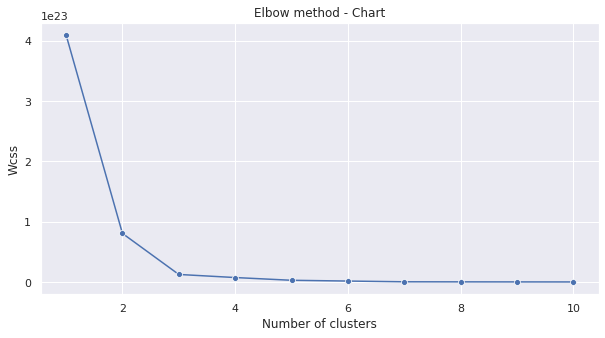

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), k_list, marker='o', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.title('Elbow method - Chart')

##------------------Modeling-----------------------

##Set Features

In [ ]:
param_to_drop = ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Target_class', 'Target_class_pec', 'Target_class_label']

X = df_stock_data.drop(columns=param_to_drop)
y = df_stock_data['Target_class_label']


##Set train/ test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 88, stratify = y)

#Normalize (func)

In [ ]:
def normalize_data_stocks(X_train, X_test):
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_train = pd.DataFrame(X_train, columns=X.columns)
  X_test = scaler.transform(X_test)
  X_test = pd.DataFrame(X_test, columns=X.columns)
  return scaler, X_train, X_test

#Correlation HeatMap (func)

In [ ]:
def correaltion_heatmap():
  names = X.columns
  correlations = X.corr()

  # plot correlation matrix
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(correlations, vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(names),1)
  ax.set_xticks(ticks)
  ax.set_yticks(ticks)
  ax.set_xticklabels(names, rotation = 90)
  ax.set_yticklabels(names)
  plt.show()

#Feature Selection

Feature Importances :  [0.0515852  0.06042675 0.05377571 0.07053632 0.         0.03569813
 0.03325849 0.         0.07907767 0.03568205 0.08381588 0.08166409
 0.06997644 0.0629075  0.06174371 0.02658213 0.         0.04862647
 0.04106138 0.03022069 0.04171558 0.0316458 ]


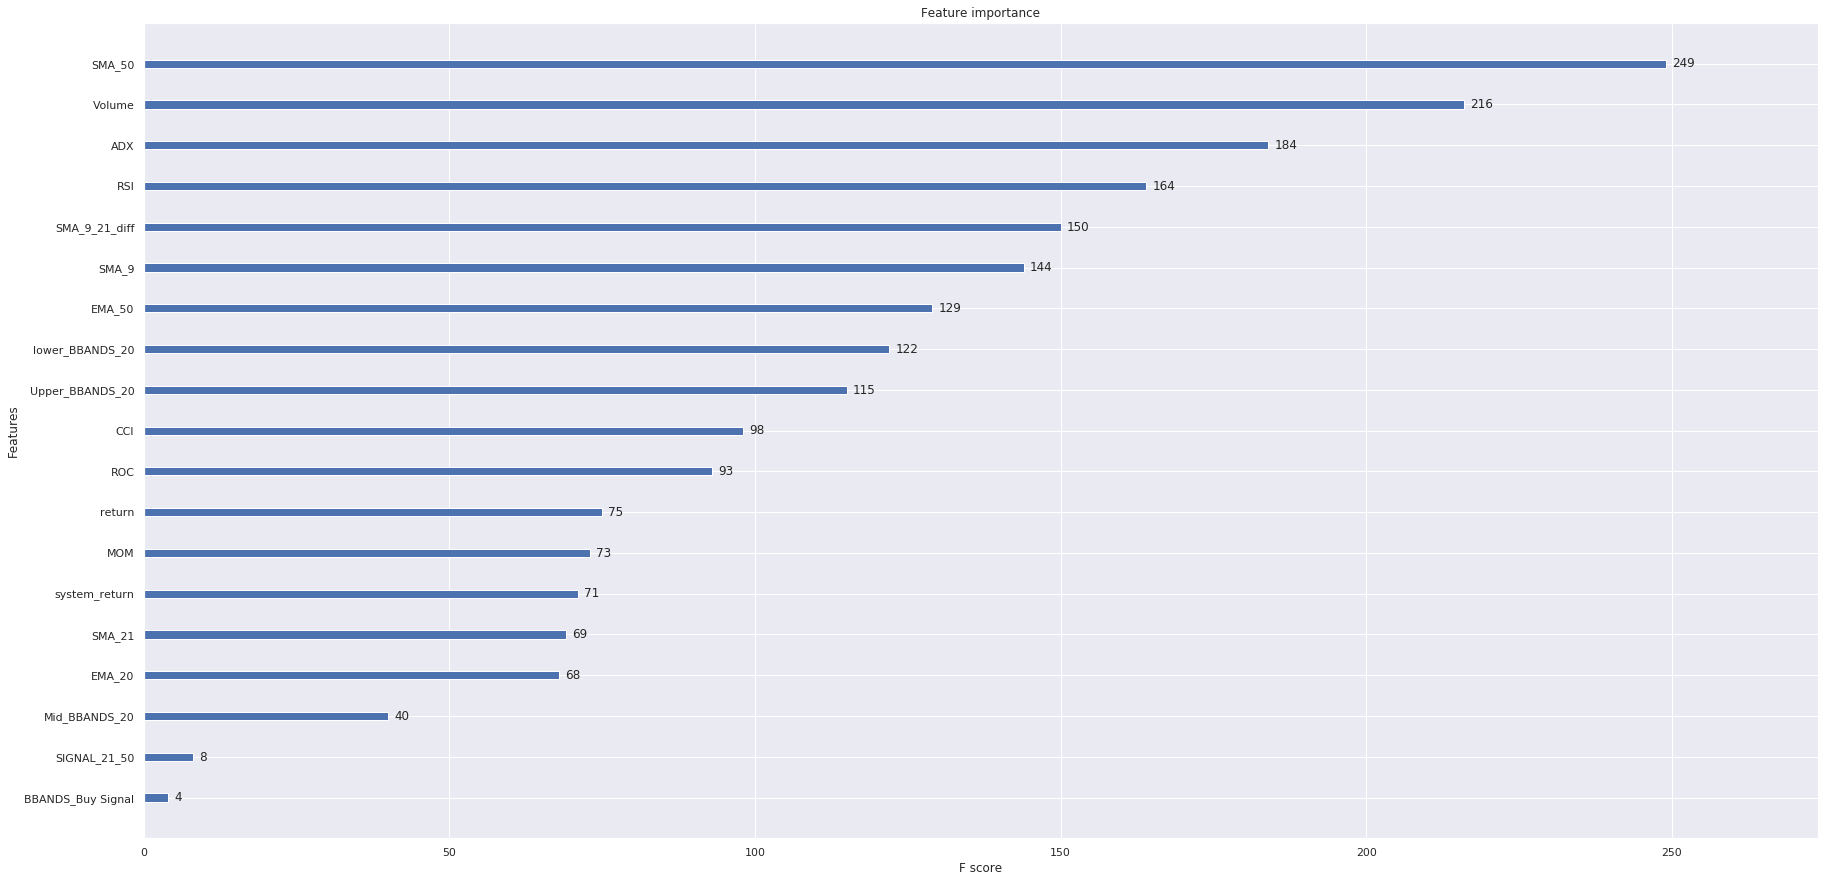

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0,max_depth=5 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)
# importances_xgb = xgb_model.feature_importances_

# plot feature importance
sns.set(rc={'figure.figsize':(30,15)})
plot_importance(xgb_model)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier #Random Forest

forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

                    Importance
SMA_50                       8
EMA_50                       7
Volume                       7
SMA_9_21_diff                7
lower_BBANDS_20              7
ADX                          6
Upper_BBANDS_20              6
EMA_20                       6
SMA_9                        6
SMA_21                       6
Mid_BBANDS_20                6
RSI                          5
ROC                          5
MOM                          4
CCI                          4
return                       4
system_return                4
SIGNAL_21_50                 1
SIGNAL_9_21                  0
entry                        0
BBANDS_Buy Signal            0
BBANDS_Sell Signal           0


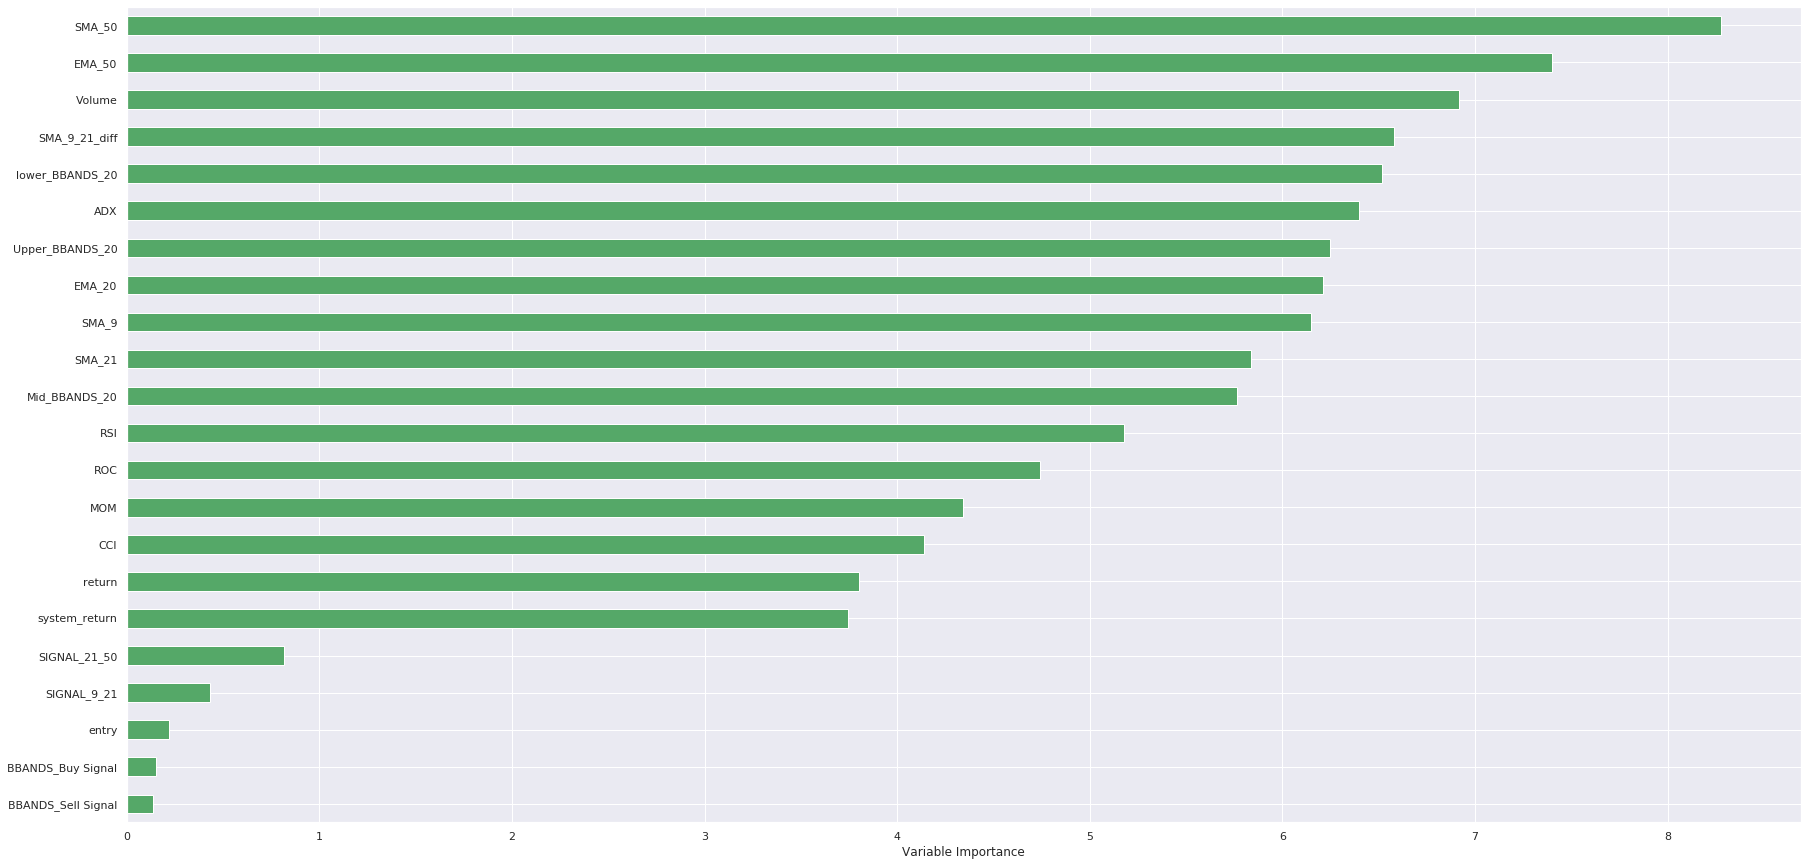

In [ ]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
Importance = Importance.nlargest(40,'Importance')
print(Importance.sort_values('Importance', axis=0, ascending=False))

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='g', )
sns.set(rc={'figure.figsize':(30,15)})
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
# saved optimal features as dataframe
col_list= pd.DataFrame(Importance).transpose().columns
col_list
x=X[col_list]


# Select Best Model

In [ ]:

# # Decision Tree - grid search
# from sklearn import model_selection

# grid = {'min_samples_split': [2, 20, 50, 100], 'max_depth': [None, 3, 5, 10], 'max_leaf_nodes': [None, 500, 600],}

# grid_search = model_selection.GridSearchCV(dtree, param_grid=grid, scoring='f1_weighted', cv=5, n_jobs=20, verbose=10)

# # find k-best
# k_to_score = {}
# k_to_r2 = {}
# for k in range(1, 101):
#   temp_model = KNeighborsRegressor(n_neighbors=k, weights='distance')
#   temp_model.fit(X_train, y_train)
#   score = metrics.mean_absolute_error(y_test, temp_model.predict(X_test))
#   k_to_score[k] = score
#   k_to_r2[k] = temp_model.score(X_test, y_test)

In [ ]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
data_Selected

# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.788686 (0.009832)
CART: 0.821545 (0.017040)
SVM: 0.787743 (0.009821)
RF: 0.873133 (0.014223)
NB: 0.650509 (0.012663)


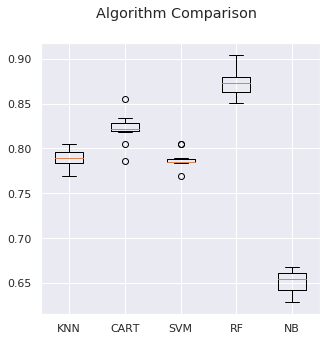

In [ ]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10, n_jobs=4, criterion='gini')
predy=rf.fit(X_train, y_train)

In [ ]:
pred_rf= rf.predict(X_test)

# Print Results (func)

In [ ]:
def print_results():
  print(accuracy_score(y_test, pred_rf))
  print(confusion_matrix(y_test, pred_rf))
  print(classification_report(y_test, pred_rf))

#Prediction


In [ ]:
last_date = df_stock_data[df_stock_data['Date']==df_stock_data['Date'].max()]
last_date = last_date.drop(columns=param_to_drop)
pred_rf= rf.predict(last_date)
pred_rf[0]

0

#----------------Export Data-----------------

## Save File in Drive

In [ ]:
# root = '/content/drive/MyDrive/Final Project/'
# stock_data.to_csv(root + "Trading_Algorithem2.csv", sep=',')